# PRESIDENT DUTERTE'S WORD COUNT
by: Jamsed Cabili

# TABLE OF CONTENTS

1. [Number of Transcripts Scraped](#section1)

    1.1 [Total Number of Transcrips](#section11)
    
    1.2 [Number of Transcripts Yearly basis](#section12)
    
    1.3 [Number of Transcripts Monthly basis](#section13)    
    
    1.4 [Total Number of Words](#section14)
    
    
2. [Word Cloud](#section2)

    2.1 [Word Cloud of All Transcripts](#section21)
    
    2.2 [Word Cloud of 2016 Transcripts](#section22)    
    
    2.3 [Word Cloud of 2017 Transcripts](#section23)        
    
    2.4 [Word Cloud of 2018 Transcripts](#section24)            
    
    2.5 [Word Cloud of 2019 Transcripts](#section25)  
    
    2.6 [Word Cloud of 2020 Transcripts](#section26)
    
  
3. [Word Count of Specific Words](#section3)

    3.1 [Health, Education, Safety, Love, Kill, Putangina](#section31)
    
    3.2 [Kalusugan,  Edukasyon, Kaligtasan, Mahal, Patayin, Putangina](#section32)
    
    3.3 [Combine](#section33)       
    
    
    
4. [Countries Frequently Mentioned](#section4)


5. [Nationality Frequently Mentioned](#section5)


6. [Frequency Mentioned his top donors' Last Name](#section6)


7. [Favorite Swear Words](#section7)


8. [Number of times Mentioned 'Bong'](#section8)
    
    8.1 [Mentioned 'Bong' Yearly basis](#section81)
    
    8.2 [Mentioned 'Bong' Monthly basis](#section82)    

In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib .pyplot as plt
import seaborn as sns
import re

>Let's load the file

In [2]:
with open('pickles\\df.pkl', 'rb') as fl:
    df = pkl.load(fl)
df

,date,title,url,event,location,transcript
0,2020-05-26,Excerpts from Speech of President Rodrigo Roa ...,https://pcoo.gov.ph/presidential-speech/excerp...,Meeting with Philippine Army (PA) and Philippi...,"Malago Clubhouse, Malacañang Park, Manila",so ako pati si bong during my mayorship days s...
1,2020-05-25,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,i remember distinctly very well that noong nap...
2,2020-05-22,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Commencement Exercsies of the Philippine Milit...,"Malago Clubhouse, Malacañang Park, Manila","kindly sit down. , defense secretary delfin lo..."
3,2020-05-19,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"good evening my countrymen. today is may 19, t..."
4,2020-05-12,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"sir, one question. itong opening, limited move..."
...,...,...,...,...,...,...
786,2016-12-14,"Royal Banquet, Cambodia",https://www.mindanews.com/duterte-files/2016/1...,NaN,"Reception Hall, Preah Reach Damnak Serei Mongk...","your majesty, preah bat samdech preah boromnea..."
787,2016-11-29,Inauguration of Mega Drug Rehab,https://www.mindanews.com/duterte-files/2016/1...,NaN,"Fort Magsaysay, Palayan City, Nueva Ecija",kindly sit down. maraming salamat po.secretary...
788,2016-10-27,Arrival from Japan,https://www.mindanews.com/duterte-files/2016/1...,NaN,Davao International Airport,i am glad to be back from my official trip to ...
789,2016-10-21,Arrival from China and Q and A,https://www.mindanews.com/duterte-files/2016/1...,NaN,"Davao International Airport, Davao City",do you mind that i dispense with the acknowled...


>I'm gonna create functions that we will be calling repeatedly in this section.

In [3]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
with open('Filipino_Stopwords.txt', 'r') as fl:
    fil_stop_words = fl.read().split('\n')

all_stop_words = fil_stop_words
all_stop_words.extend(ENGLISH_STOP_WORDS)

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

def remove_stop(txt=_, stop_words=all_stop_words):
    '''remove stop words from a string'''
    full_txt = ''
    list_to_remove = [':', ',', '.', '’', '‘', '\'', '„', '?', '!', '‟', '`', '"', '‗']
    for rem in list_to_remove:
        txt = txt.replace(rem, '')
    
    for wrd in txt.replace('\n', ' ').split(' '):
        if not wrd in stop_words:
            full_txt += ' ' + wrd
#             if 'yung' in wrd:
#                 print(wrd)
    return full_txt

def remove_stop_lt(txt_lt=_, stop_words=all_stop_words):
    '''remove stop words from a list of string'''
    list_to_remove = [':', ',', '.', '’', '‘', '\'', '„', '?', '!', '‟', '`', '"', '‗']
    for i in range(len(txt_lt)):
        txt = txt_lt[i]
        full_txt = ''
        for rem in list_to_remove:
            txt = txt.replace(rem, '')

        for wrd in txt.replace('\n', ' ').split(' '):
            if not wrd in stop_words:
                full_txt += ' ' + wrd

        txt_lt[i] == full_txt
    return txt_lt


def concat_ser(ser):
    '''concatenate the series and return one string'''
    return ' '.join(ser.tolist())
    
    
def create_word_cloud(data, ax=plt):
    '''creates a word cloud from a series or a string'''
    if type(data) == pd.Series:
        data = concat_ser(data)
    all_stop_words = fil_stop_words
    all_stop_words.extend(ENGLISH_STOP_WORDS)

    wc = WordCloud(background_color='white', mode='RGB')
    data = remove_stop( data, all_stop_words)
    wc.generate(data)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

def create_word_cloud2(dict_freq, stop_words=all_stop_words, ax=plt):
    """
    Create a word cloud from dictionary frequency
    """
    wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', random_state=42)
    wc.generate_from_frequencies(dict_freq)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

def create_word_cloud_tfidf(data, ax=plt):
    all_stop_words = fil_stop_words
    all_stop_words.extend(ENGLISH_STOP_WORDS)

    data = remove_stop_lt(data, all_stop_words)
    vectorizer = TfidfVectorizer(norm=None)

    vectorizer.fit(data)

    transformed = vectorizer.transform(data)
    max_val = transformed.max(axis=0).toarray().ravel()
    max_val_sorted_index = max_val.argsort()
    feature_names = np.array(vectorizer.get_feature_names())
    dict_frequency = {}

    for i in range(len(max_val)):
        word = feature_names[max_val_sorted_index[i]]
        weight = max_val[max_val_sorted_index[i]]
        dict_frequency[word] = weight
    create_word_cloud2(dict_frequency, ax=ax)

def count_num_occur(target, key):
    """
    Count the number of occurences of a key in target (if a key is equal to a word)
    """
    count = 0
    if type(key) == str:
        key = [key]
        
    lt_target = target.split(' ')
    for i in range(len(lt_target)):
        wrd = lt_target[i]
        if wrd == key[0]:
            isSame = True
            for j in range(len(key)):
                #check if it exceeded the length of the target and if not equal
                if  len(lt_target) != i + j and key[j] != lt_target[j + i]:
                    isSame =False
                    break
               
            if isSame:
                count += 1
    return count

def count_num_occur_in(target, key):
    """
    Count the number of occurences of a key in target (if a key exist in a word)
    """
    count = 0
    if type(key) == str:
        key = [key]
        
    lt_target = target.split(' ')
    for i in range(len(lt_target)):
        wrd = lt_target[i]
        if key[0] in wrd:
            isSame = True
            for j in range(len(key)):
                #check if it exceeded the length of the target and if not equal
                if  len(lt_target) != i + j and key[j] not in lt_target[j + i]:
                    isSame =False
                    break
               
            if isSame:
                count += 1
    return count

def count_num_occur_multi_keys(target, keys):
    """
    Count the number of occurences of multiple keys in a target (if the keys are euqal to a word)
    """
    names = keys
    count = 0

    #first find if contain multiple names
    if keys.find('|') != -1:
        names = [x.strip() for x in keys.split('|')]
        for name in names:
            count += count_num_occur(target, name.split(' '))
    else:
        count = count_num_occur(target, keys.split(' '))
        
    return count

def count_num_occur_multi_keys_in(target, keys):
    """
    Count the number of occurences of multiple keys in a target (if the keys is in a word)
    """
    names = keys
    count = 0

    #first find if contain multiple names
    if keys.find('|') != -1:
        names = [x.strip() for x in keys.split('|')]
        for name in names:
            count += count_num_occur_in(target, name.split(' '))
    else:
        count = count_num_occur_in(target, keys.split(' '))
        
    return count

def find_occur(target, key,  num=-1, offset=10):
    """
        Find occurences of key in the target and return a list of string.
        
        Keyword arguments:
        target -- string
        key -- list of string or just string
        num -- number occurences to find
        offset -- number of words on its right
    """
    if num == -1:
        num = count_num_occur(target, key)
    #check if word is a list or a string
    if type(key) == str:
        key = [key]
    target_lt = target.split(" ")
    lt = []
    count_num_target = 0
    count_num_words = 0
    isSame = False
    
    for i in range(len(target_lt)):
        if target_lt[i] == key[0]:
            isSame= True
            #check if the remaining words are also equal
            for j in range(len(key)):
                if target_lt[j + i] != key[j]:
                    isSame = False
                    break
                    
            if isSame:
                count_num_target += 1
                txt = ''
            if count_num_target == num:
                break
        
        if isSame:
            txt += ' ' + target_lt[i]
            count_num_words += 1
            #once we reached the offset
            if count_num_words == offset:
                isSame = False
                lt.append(txt)
                count_num_words = 0
                txt = ''
        
    return lt


from matplotlib import transforms
def rainbow_text(x, y, strings, colors, size, orientation='horizontal',
                 ax=None,  **kwargs):
    """
    So a line of text can have multiple colors in our graph
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c, si in zip(strings, colors, size):
        text = ax.text(x, y, s, color=c, transform=t, fontdict={'fontsize':si}, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')
            
def show_number(counts, words=None, x_offset=0, y_offset=0, orientation='vertical', 
                round_off=False, dec_place=0, ax=plt, colors=None, **kwargs):
    """Shows number in the bag graph"""
    if not words:
        words = counts 
        
    if round_off:
        if dec_place == 0:
            counts = np.round(counts, 0).astype(int)
        else:
            counts = np.round(counts, dec_place)
    if orientation == 'vertical':
        if colors:
            if 'fontdict' in kwargs:
                font_val = kwargs['fontdict']
                del kwargs['fontdict']

            for i, (word, count, col) in enumerate(zip(words, counts, colors)):
                font_val['color'] = col
                ax.text(i+x_offset, count+y_offset, word, fontdict=font_val, **kwargs )
                del font_val['color']
        else:
            for i, (word, count) in enumerate(zip(words, counts)):
                ax.text(i+x_offset, count+y_offset, word, **kwargs)
    else:
        if colors:
            if 'fontdict' in kwargs:
                font_val = kwargs['fontdict']
                del kwargs['fontdict']

            for i, (word, count, col) in enumerate(zip(words, counts, colors)):
                font_val['color'] = col
                ax.text(count+x_offset, i+y_offset, word, fontdict=font_val, **kwargs )
                del font_val['color']
        else:
            for i, (word, count) in enumerate(zip(words, counts)):
                ax.text(count+x_offset, i+y_offset, word, **kwargs)
        

def get_size_color(colors, size_black, size_others):
    sizes = []
    col = []
    for color in colors:
        if color == 'black':
            sizes.append(size_black)
            col.append(color)
        elif color == 'black2':#for quotation same size with others but different color
            sizes.append(size_others)
            col.append('black')
        else:
            sizes.append(size_others)
            col.append(color)
            
    return sizes, col

# 1. Number of Transcripts <div id='section1'> </div>

## 1.1Total number of Transcripts <div id='section11'> </div>

In [5]:
full_txt = concat_ser(df.transcript)
full_txt = remove_stop(full_txt)
df_all = pd.Series(data={'num_transcript': df.transcript.shape[0], 'concat_trans':full_txt}, name='all').to_frame().T
print(f'Total Number of Transcripts: {df_all.num_transcript.values[0]}')
display(df_all)

Total Number of Transcripts: 791


,num_transcript,concat_trans
all,791,pati bong mayorship days moment bong right na...


## 1.2 Number of Transcripts Yearly Basis <div id='section12'> </div>

In [6]:
#group records by year
grouped_year = df.groupby(df.date.map(lambda x: x.year))

years = [2016, 2017, 2018, 2019, 2020]
concat_trans_years = []
size = []
for year in years:
    trans_ser = grouped_year.get_group(year).transcript
    size.append(trans_ser.shape[0])
    trans_str = concat_ser(trans_ser)
    trans_str = remove_stop(trans_str)
    concat_trans_years.append(trans_str)
df_years = pd.DataFrame(index=years, data={'concat_trans':concat_trans_years, 'num_trans':size})
display(df_years)

,concat_trans,num_trans
2016,president fidel ramos sir salamat tulong maki...,180
2017,kindly sit salamat secretary delfin lorenzana...,234
2018,salamat kindly sit agrarian reform secretary ...,195
2019,kindly sit sorry looking social welfare devel...,131
2020,pati bong mayorship days moment bong right na...,51


Let's plot it.

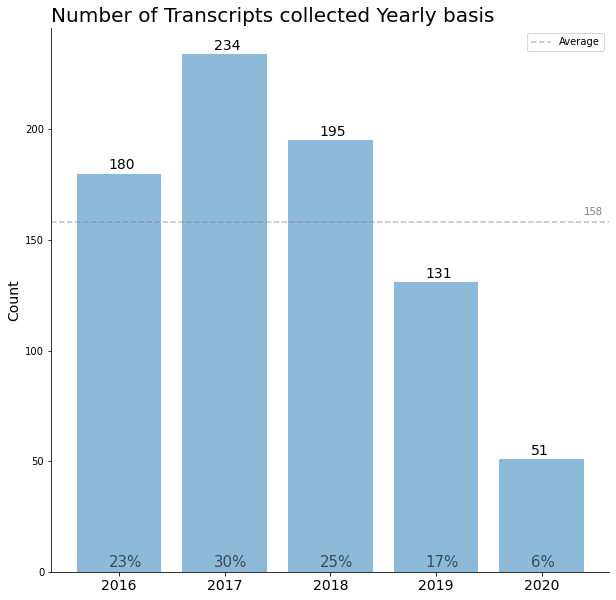

In [7]:
counts = df_years.num_trans.values.tolist()
words = df_years.index.values.tolist()

#Plot
plt.figure(figsize=(10, 10))
plt.bar(range(len(counts)), counts, alpha=0.5)
plt.xticks(range(len(words)), words, size=14)
plt.ylabel('Count', size=14)

#Show Count
show_number(counts, x_offset=-0.1, y_offset=2, fontdict={'fontsize':14})
#Show Percentage
sm = df_years.num_trans.sum()
percentage = [str(int(round(x/sm * 100, 0))) + '%' for x in df_years.num_trans.values]
show_number(np.full(len(words), 2), percentage, x_offset=-0.1, 
            fontdict={'fontsize':15, 'alpha':0.6})

#Average Line
ave = df_years.num_trans.mean()
plt.axhline(ave, linestyle='--', color='grey', alpha=0.5, label=f'Average')
plt.text(4.4, ave+3, int(ave), color='grey')

# Title
plt.title('Number of Transcripts collected Yearly basis', loc='left', fontdict={'fontsize':20})
plt.legend()
sns.despine()
# plt.savefig('pictures\\Number_Transcripts_Years.png')

## 1.3 Number of Transcripts collected monthly basis <div id='section13'> </div>

In [8]:
#grouped by months
grouped_month = df.groupby(df.date.map(lambda x: (x.year, x.month)))

concat_trans_month = []
size = []
for group in grouped_month.groups:
    trans_ser = grouped_month.get_group(group).transcript
    size.append(trans_ser.shape[0])
    trans_str = concat_ser(trans_ser)
    trans_str = remove_stop(trans_str)
    concat_trans_month.append(trans_str)
    
#name months accordingly 
month = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
group_name = []
num_month_year = {}
for group in grouped_month.groups.keys():
    group_name.append(f'{group[0]}, {month[group[1]-1]}')
    #we're going to track the number of months in a year we have
    if group[0] in num_month_year.keys():
        num_month_year[group[0]] += 1
    else:
        num_month_year[group[0]] = 1

df_years['num_months'] = num_month_year.values()
df_months = pd.DataFrame(data={'date_str':group_name, 'concat_trans':concat_trans_month, 'num_trans':size}, 
                         index=grouped_month.groups)
display(df_months)

date_str                                       concat_trans  \
2016 6   2016, Jun.   president fidel ramos sir salamat tulong maki...   
     7   2016, Jul.   let begin addressing officer brigadier genera...   
     8   2016, Aug.   really intend interrupt ganito discourteous w...   
     9   2016, Sep.   maayong hapon let begin work id like remind y...   
     10  2016, Oct.   salamat kindly sit secretary judy taguiwalo; ...   
     11  2016, Nov.   alam really wanted structures government dest...   
     12  2016, Dec.   busy day midsayap pumutok simbahan day magbiy...   
2017 1   2017, Jan.   kindly sit salamat secretary delfin lorenzana...   
     2   2017, Feb.   dureza naka raise konting pera akala ma relea...   
     3   2017, Mar.   salamat sit excellencies diplomatic corps par...   
     4   2017, Apr.   excellency president joko widodo madame irian...   
     5    2017, May   kindly sit thank secretary delfin lorenzana; ...   
     6   2017, Jun.   im glad tonight enemy contend resistance figh...   
     7   2017, Jul.   kindly sit thank courtesy read prepared speec...   
     8   2017, Aug.   pages need longer time start rattling cabinet...   
     9   2017, Sep.   kindly sit thank courtesy know came hundreds ...   
     10  2017, Oct.   prime minister abe committed flesh japans spe...   
     11  2017, Nov.   nandoon medyo matagalan amoy bagoong boodle s...   
2018 1   2018, Jan.   kindly sit assalamualaikum maraming salamat p...   
     2   2018, Feb.   time maybe alongside mass surrenders ferocity...   
     3   2018, Mar.   thank courtesy kindly sit prepared speech pag...   
     4   2018, Apr.   clear relations larger community nations asea...   
     5    2018, May   salamat kindly sit pages mul billion investme...   
     6   2018, Jun.   maraming salamat kindly standing sit sitting ...   
     7   2018, Jul.   salamat courtesy kindly sit good written spee...   
     8   2018, Aug.   daghang salamat kindly sit thank courtesy pre...   
     9   2018, Sep.   commander tikas pahinga order requested thank...   
     10  2018, Oct.   kindly sit salamat kortesiya naa koy pages sp...   
     11  2018, Nov.   kauban gobyerno bobby; asawa; opisyales diri ...   
     12  2018, Dec.   salamat kindly sit agrarian reform secretary ...   
2019 1   2019, Jan.   magandang hapon sinadya talaga pupunta maynil...   
     2   2019, Feb.   salamat kindly sit thank id like talk penchan...   
     3   2019, Mar.   kindly sit thank excellencies diplomatic corp...   
     4   2019, Apr.   nandito sigurado education secretary leonor b...   
     5    2019, May   nikkei president naotoshi okada excellencies ...   
     6   2019, Jun.   salamat kindly seats page prepared speech bab...   
     7   2019, Jul.   kindly sit magandang hapon magandang gabi pal...   
     8   2019, Aug.   ndyour excellency pleased undertake visit cor...   
     9   2019, Sep.   xiè xie kindly sit trade industry secretary r...   
     10  2019, Oct.   start question yes taking bangkok tomorrow ni...   
     11  2019, Nov.   salamat magsiupo sit think time grace occasio...   
     12  2019, Dec.   kindly sit sorry looking social welfare devel...   
2020 1   2020, Jan.   sit salamat house speaker alan peter cayetano...   
     2   2020, Feb.   kindly sit salamat late pasig maka lantsa com...   
     3   2020, Mar.   ikatlong linggo pakigbisog formidable enemy s...   
     4   2020, Apr.   ahead yes berna good evening countrymen nagpa...   
     5    2020, May   pati bong mayorship days moment bong right na...   
     6   2020, Jun.   let start discussing issues affecting health ...   

         num_trans  
2016 6           1  
     7          21  
     8          29  
     9          35  
     10         30  
     11         22  
     12         42  
2017 1          19  
     2          21  
     3          32  
     4          32  
     5          25  
     6          24  
     7          18  
     8          18  
     9          23  
     10          5  
     1

>Let's plot it

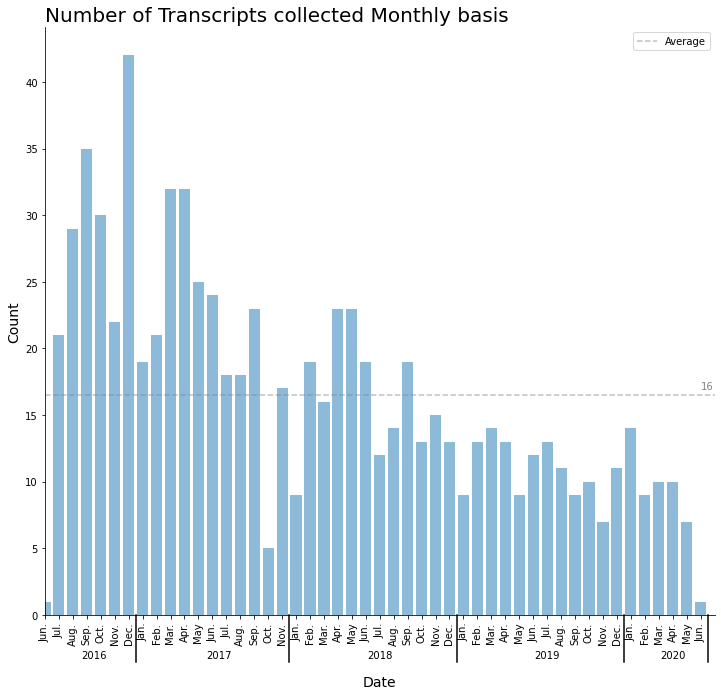

In [9]:
counts = df_months.num_trans.values.tolist()
word_mon = [x[6:].strip() for x in df_months.date_str.tolist()]

#Plot
plt.figure(figsize=(12, 12))
plt.bar(range(len(counts)),counts, alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':14})
plt.xlabel('Date', fontdict={'fontsize':14}, labelpad=30)
plt.xticks(range(len(word_mon)), word_mon, rotation=90)

#Add separator and year text for x label
total = 0
for i in df_years.index.values:
    val = df_years.loc[i, 'num_months']
    total += val
    offset = (total / df_months.shape[0]) - 0.01
    line = plt.Line2D([offset,offset], [-0.08, 0], transform=plt.gca().transAxes, color='black')
    line.set_clip_on(False)
    plt.gca().add_line(line)
    plt.text(total - (val * 0.5), -3, i,  horizontalalignment='center', verticalalignment='center',
                clip_on=False)
    
#Average
ave = df_months.num_trans.mean()
plt.axhline(ave, linestyle='--', color='grey', alpha=0.5, label='Average')
plt.text(len(counts)-1, ave+0.5, int(round(ave, 0)), color='grey')
#Title
plt.title('Number of Transcripts collected Monthly basis', fontdict={'fontsize':20}, loc='left')

plt.xlim(0, df_months.shape[0])
sns.despine()
plt.legend()
plt.subplots_adjust(bottom=0.2)
# plt.savefig('pictures\\Number_Transcripts_Months.png')
plt.show()

## 1.4 Total Number of Words <div id='section14'> </div>

In [10]:
df_all

,num_transcript,concat_trans
all,791,pati bong mayorship days moment bong right na...


In [11]:
total_num_words = len(remove_stop(df_all.concat_trans.values[0]).split(' '))
df_all['num_words'] = total_num_words
print(f'Total Number of words: {total_num_words: ,}')

Total Number of words:  1,064,390


In [12]:
df_all

,num_transcript,concat_trans,num_words
all,791,pati bong mayorship days moment bong right na...,1064390


***


# 2. WordCloud <div id='section2'> </div>

>These are just the most common word used thoruhgout the timeline. The bigger the fontsize of the words the higher the count. Nothing really interesting here since the same words keep appearing other than in 2020 where the word 'covid' started to appear.

## 2.1 Word Cloud of All collected Transcripts <div id='section21'> </div>

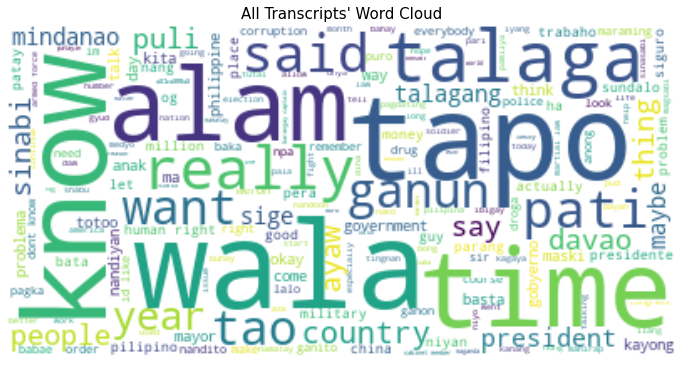

In [13]:
plt.figure(figsize=(12, 12))
create_word_cloud(data=df_all.concat_trans.values[0])
plt.title("All Transcripts' Word Cloud", size=15)
# plt.savefig('pictures\\Word_Cloud_All.png')
plt.show()

## 2.2 Word Cloud of Year 2016 Transcripts <div id='section22'> </div>

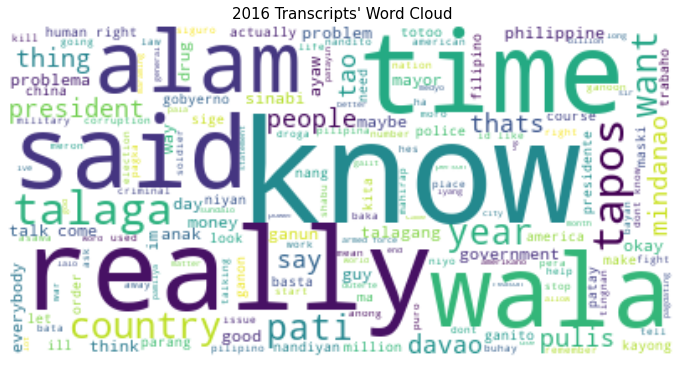

In [14]:
plt.figure(figsize=(12, 12))
create_word_cloud(data=df_years.loc[2016, 'concat_trans'])
plt.title("2016 Transcripts' Word Cloud", size=15)
# plt.savefig('pictures\\Word_Cloud_2016.png')
plt.show()

## 2.3 Word Cloud of Year 2017 Transcripts <div id='section23'> </div>

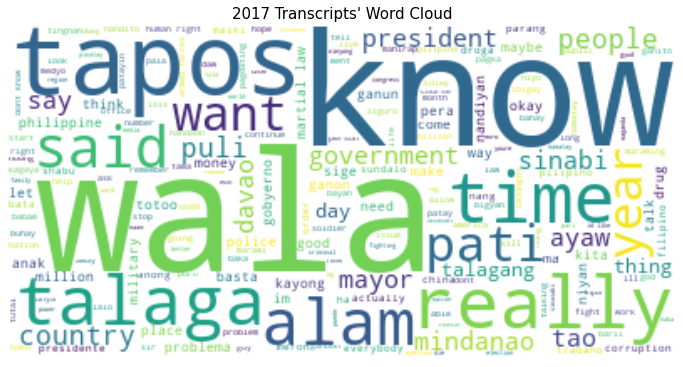

In [15]:
plt.figure(figsize=(12, 12))
create_word_cloud(data=df_years.loc[2017, 'concat_trans'])
plt.title("2017 Transcripts' Word Cloud", size=15)
# plt.savefig('pictures\\Word_Cloud_2017.png')
plt.show()

## 2.4 Word Cloud of Year 2018 Transcripts <div id='section24'> </div>

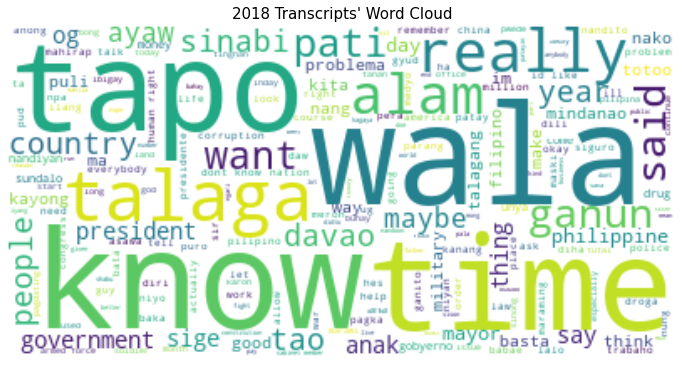

In [16]:
plt.figure(figsize=(12, 12))
create_word_cloud(data=df_years.loc[2018, 'concat_trans'])
plt.title("2018 Transcripts\' Word Cloud", size = 15)
# plt.savefig('pictures\\Word_Cloud_2018.png')
plt.show()

## 2.5 Word Cloud of Year 2019 Transcripts <div id='section25'> </div>

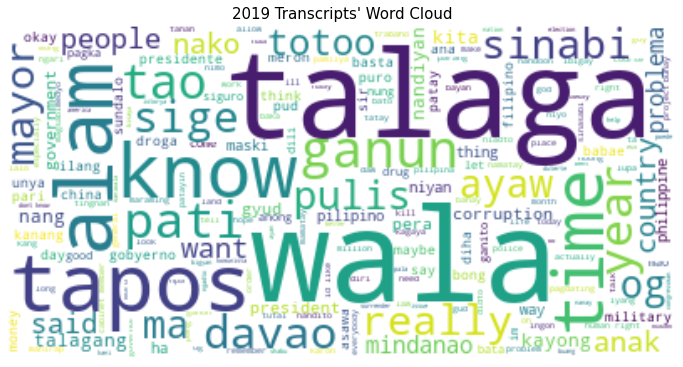

In [17]:
plt.figure(figsize=(12, 12))
create_word_cloud(data=df_years.loc[2019, 'concat_trans'])
plt.title("2019 Transcripts' Word Cloud", size = 15)
# plt.savefig('pictures\\Word_Cloud_2019.png')
plt.show()

## 2.6 Word Cloud of Year 2020 Transcripts <div id='section26'> </div>

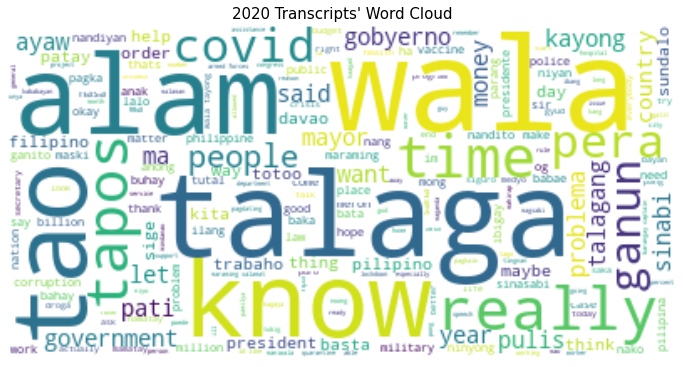

In [21]:
plt.figure(figsize=(12, 12))
create_word_cloud(data=df_years.loc[2020, 'concat_trans'])
plt.title("2020 Transcripts' Word Cloud", size = 15)
# plt.savefig('pictures\\Word_Cloud_2020.png')
plt.show()

___

# 3 DU30's Mouth Priority <div id='section3'> </div>


## 3.1 Health,  Environment, Education,  Economy, Security,  Terrorism, Peace, Love, Kill, and  Putangina <div id='section31'> </div>
>We're just going to perform a word count for these words. For some reason there are many ways the phrase "putang ina" is written because it is censored, sometimes there is an excess or lack of asterisk (p\*\*\*\* i\*\*), concatenated together as 1 word (p\*\*\*\*i\*\* / p\*\*\*\*\*\*\*) or not censored at all (putangina). For the first case I'm going to use regular expression basically any word that starts with 'p' and followed by asterisk '\*' character and the next word after it starts with 'i' and followed also by '\*' asterisk we're going to increment the counter for putang ina. As for the other ways it is written I'm going to use the same method for other words which is if they are equal to the target then increment count.


In [18]:
df_all

,num_transcript,concat_trans,num_words
all,791,pati bong mayorship days moment bong right na...,1064390


In [19]:
key_word = ['health',  'environment', 'education', 
            'economy', 'security',  'terrorism', 'peace', 
            'love', 'kill'] 
key_word_putang_ina = ['p********', 'p*****i**',  'putang ina', 'putangina']

#append the different ways putang ina is written separated by  ' | '
key_word.append(' | '.join(key_word_putang_ina))

#their names
words = ['health', 'environment', 'education', 
         'economy', 'security', 'terrorism', 
        'peace', 'love', 'kill', 'putang_ina']

#count
for word, key in zip(words, key_word):
    df_all[f'{word}_freq'] = count_num_occur_multi_keys(df_all.concat_trans.values[0], key)
print(df_all['putang_ina_freq'].values[0])

#check p** i** pattern
count = 0
txt_lt = df_all.concat_trans.values[0].split(' ')
for i in range(len(txt_lt)):
    #check putang
    if bool(re.search('p\*+', txt_lt[i])):
        #check ina
        if bool(re.search('i\*+', txt_lt[i + 1])):
            count+= 1
df_all.loc['all', 'putang_ina_freq'] += count
df_all.T

118


,all
num_transcript,791
concat_trans,pati bong mayorship days moment bong right na...
num_words,1064390
health_freq,339
environment_freq,218
education_freq,234
economy_freq,251
security_freq,707
terrorism_freq,414
peace_freq,939


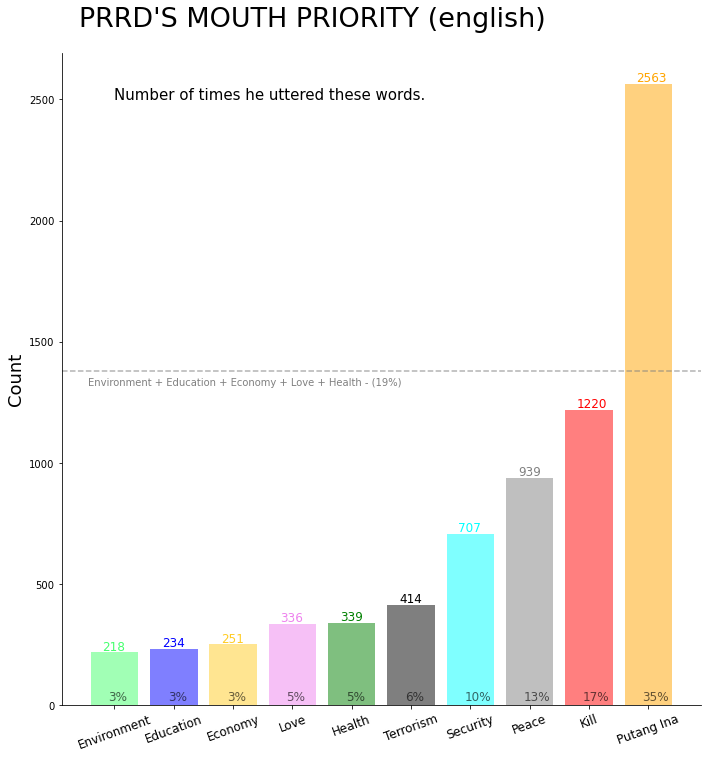

In [22]:
words = ['health', 'environment', 'education', 
         'economy', 'security', 'terrorism',
         'peace', 'love', 'kill']
colors = ['green', '#44ff6d', 'blue', 
          '#ffcc24','cyan', 'black', 
          'grey', 'violet', 'red', 'orange']
counts = [df_all[f'{x}_freq'].values[0] for x in words]
words.append('Putang Ina')
counts.append(df_all['putang_ina_freq'].values[0])

#format properly
words = [x.title() for x in words]
#sort them
sort_index = np.array(counts).argsort()
words = [words[i] for i in sort_index]
counts = [counts[i] for i in sort_index]
colors = [colors[i] for i in sort_index]
# colors = list(np.full((len(words)), 'blue'))

#plot
plt.figure(figsize=(12, 12))
plt.bar(range(len(words)), counts, color=colors, alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':18})
plt.xticks(range(len(words)), words, size=12, rotation=20)

#Show Count
show_number(counts, x_offset=-0.2, y_offset=+10, colors=colors, fontdict={'fontsize':12})
#Show Percentage
sm = sum(counts)
percentage = [str(int(round(x / sm * 100, 0))) + '%' for x in counts]
show_number(np.full((len(percentage)), 100), words=percentage, x_offset=-0.1, 
            y_offset=-80, fontdict={'fontsize':12, 'alpha':0.6})


#Text Title
plt.text(-0.6, 2800, 'PRRD\'S MOUTH PRIORITY (english)', size=27)
plt.text(0, 2500, 'Number of times he uttered these words.', size=15)


#line
percent = str(sum([int(round((x / sm) * 100, 0)) for x in counts[:5]]))
first_5 = ' + '.join(words[:5])
plt.text(-0.45, sum(counts[:5]) - 60, f'{first_5} - ({percent}%)', \
         fontdict={'color':'grey'}, alpha=1)
plt.axhline(sum(counts[:5]), color='grey', linestyle='--', alpha=0.6)
sns.despine()
plt.gcf().subplots_adjust(left=0.16)
# plt.savefig('pictures\\prrd_mouth_priority_eng.png')
plt.show()

## 3.2 Kalusugan,  Edukasyon, Kaligtasan, Mahal, Patayin, Putangina <div id='section32'> </div>

In [23]:
words = ['kalusugan', 'kapaligiran', 'edukasyon', 
         'ekonomiya', 'seguridad', 'terorismo',
        'kapayapaan', 'mahal', 'patayin']
for word in words:
    df_all[f'{word}_freq'] = df_all.concat_trans.apply(lambda x: count_num_occur(x, word))
df_all.T

,all
num_transcript,791
concat_trans,pati bong mayorship days moment bong right na...
num_words,1064390
health_freq,339
environment_freq,218
education_freq,234
economy_freq,251
security_freq,707
terrorism_freq,414
peace_freq,939


>Let's plot it

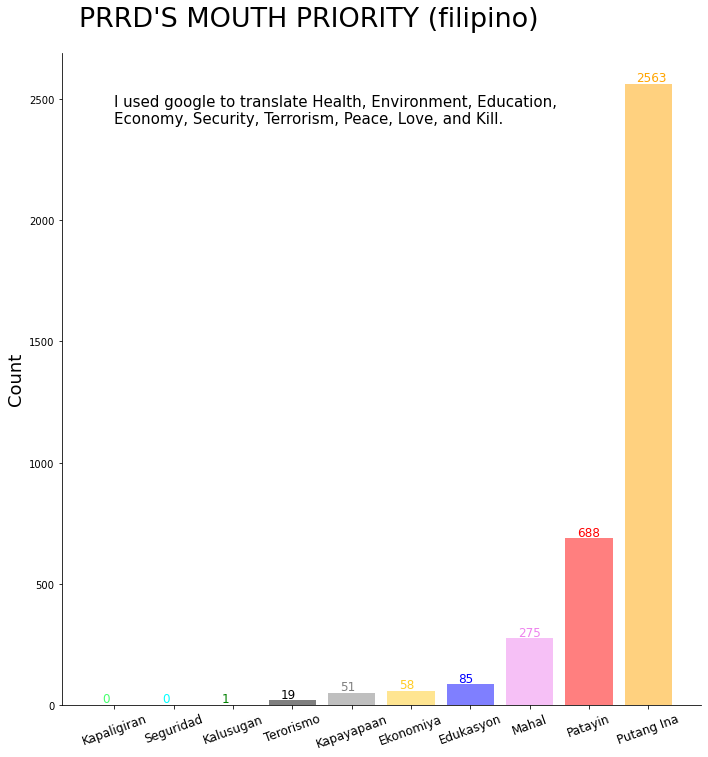

In [24]:
words = ['kalusugan', 'kapaligiran', 'edukasyon', 
         'ekonomiya', 'seguridad', 'terorismo',
        'kapayapaan', 'mahal', 'patayin']
colors = ['green', '#44ff6d', 'blue', 
          '#ffcc24','cyan', 'black', 
          'grey', 'violet', 'red', 'orange']
counts = [df_all[f'{x}_freq'].values[0] for x in words]
words.append('Putang Ina')
counts.append(df_all['putang_ina_freq'].values[0])

#format properly
words = [x.title() for x in words]
#sort them
sort_index = np.array(counts).argsort()
words = [words[i] for i in sort_index]
counts = [counts[i] for i in sort_index]
colors = [colors[i] for i in sort_index]

#Plot
plt.figure(figsize=(12, 12))
plt.bar(range(len(words)), counts, color=colors, alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':18})
plt.xticks(range(len(words)), words, size=12, rotation=20)

#Show count
show_number(counts, x_offset=-0.2, y_offset=+10, colors=colors, fontdict={'fontsize':12})

#Text Title
plt.text(-0.6, 2800, 'PRRD\'S MOUTH PRIORITY (filipino)', size=27)
plt.text(0, 2400, 'I used google to translate Health, Environment, Education, \n\
Economy, Security, Terrorism, Peace, Love, and Kill.', size=15)


#percentage
sm = sum(counts)
percentage = [ str(int(round((x / sm) * 100, 0))) + '%' for x in counts]
# show_number(np.zeros(len(words)) + 100, percentage, x_offset=-0.1, y_offset=-80, fontdict={'fontsize':15, 'alpha':0.6})

# percent = str(sum([int(round((x / sm) * 100, 0)) for x in counts[:5]]))
# plt.text(-0.45, sum(counts[:5]) - 50, f'Environment + Education + Economy + Love + Health  ({percent}%)', \
#          fontdict={'color':'grey'}, alpha=1)
# plt.axhline(sum(counts[:5]), color='grey', linestyle='--', alpha=0.6)
sns.despine()
plt.gcf().subplots_adjust(left=0.16)
# plt.savefig('pictures\\prrd_mouth_fil.png')
plt.show()

## 3.3 Combine <div id='section33'> </div>

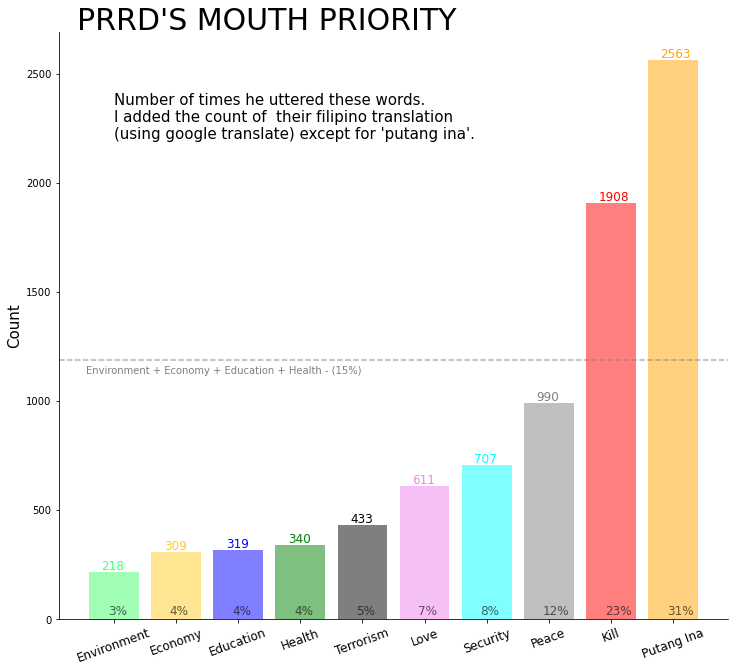

In [25]:
words_fil = ['kalusugan', 'kapaligiran', 'edukasyon', 
         'ekonomiya', 'seguridad', 'terorismo',
        'kapayapaan', 'mahal', 'patayin']
words_eng = ['health', 'environment', 'education', 
         'economy', 'security', 'terrorism',
         'peace', 'love', 'kill']
colors = ['green', '#44ff6d', 'blue', 
          '#ffcc24','cyan', 'black', 
          'grey', 'violet', 'red', 'orange']

#Add counts of english words and its corresponding filipino words
counts = [df_all[f'{x}_freq'].values[0] + df_all[f'{y}_freq'].values[0]  for x, y in zip(words_fil, words_eng)]

#Append 'putang ina'
words_eng.append('Putang Ina')
counts.append(df_all['putang_ina_freq'].values[0])

#Format words properly
words_eng = [x.title() for x in words_eng]

#Sort data
sort_index = np.array(counts).argsort()
words_eng = [words_eng[i] for i in sort_index]
colors = [colors[i] for i in sort_index]
counts = sorted(counts)

#PLOT
plt.figure(figsize=(12, 12))
plt.bar(range(len(words_eng)), counts, color=colors, alpha=0.5)
plt.xticks(range(len(words_eng)), words_eng, size=12, rotation=20)
plt.ylabel('Count', size=15)

#Show Count
show_number(counts, x_offset=-0.2, y_offset=+10, colors=colors, fontdict={'fontsize':12})
#Show Percentage
sm = sum(counts)
percentage = [str(int(round(x / sm * 100, 0))) + '%' for x in counts]
show_number(np.full((len(percentage)), 100), words=percentage, x_offset=-0.1, 
            y_offset=-80, fontdict={'fontsize':12, 'alpha':0.6})
#line
percent = str(sum([int(round((x / sm) * 100, 0)) for x in counts[:4]]))
first_5 = ' + '.join(words_eng[:4])
plt.text(-0.45, sum(counts[:4]) - 60, f'{first_5} - ({percent}%)', \
         fontdict={'color':'grey'}, alpha=1)
plt.axhline(sum(counts[:4]), color='grey', linestyle='--', alpha=0.6)


#Text Title
plt.text(-0.6, 2700, 'PRRD\'S MOUTH PRIORITY', size=30)
plt.text(0, 2200, "Number of times he uttered these words. \n\
I added the count of  their filipino translation\n\
(using google translate) except for 'putang ina'.", size=15)



sns.despine()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1))
plt.subplots_adjust(bottom=0.2)
# plt.savefig('pictures\\prrd_mouth_priority.png')
plt.show()

***

# 4. Countries Frequently Mentioned <div id='section4'> </div>
>Let's see his most mentioned country. Load the names of countries first. 

In [26]:
df_countries = pd.read_csv('Other Data\\countries.csv')
df_countries

,CCA2,Name,CCA3,Nationality
0,AD,Andorra,AND,Andorran
1,AE,United Arab Emirates,ARE,Emirati
2,AF,Afghanistan,AFG,Afghan
3,AG,Antigua and Barbuda,ATG,"Antiguan, Barbudan"
4,AI,Anguilla,AIA,Anguillian
...,...,...,...,...
256,YE,Yemen,YEM,Yemeni
257,YT,Mayotte,MYT,French
258,ZA,South Africa,ZAF,South African
259,ZM,Zambia,ZMB,Zambian


In [27]:
df_countries['name_lower'] = df_countries.Name.str.lower()
df_countries

,CCA2,Name,CCA3,Nationality,name_lower
0,AD,Andorra,AND,Andorran,andorra
1,AE,United Arab Emirates,ARE,Emirati,united arab emirates
2,AF,Afghanistan,AFG,Afghan,afghanistan
3,AG,Antigua and Barbuda,ATG,"Antiguan, Barbudan",antigua and barbuda
4,AI,Anguilla,AIA,Anguillian,anguilla
...,...,...,...,...,...
256,YE,Yemen,YEM,Yemeni,yemen
257,YT,Mayotte,MYT,French,mayotte
258,ZA,South Africa,ZAF,South African,south africa
259,ZM,Zambia,ZMB,Zambian,zambia


>We're going to traverse through this and count the occurences in the transcript

In [28]:
freq_countries = []
for country in df_countries.name_lower.values:
    freq_countries.append(count_num_occur(df_all.concat_trans.values[0], country))
df_countries['country_freq'] = freq_countries
df_countries

,CCA2,Name,CCA3,Nationality,name_lower,country_freq
0,AD,Andorra,AND,Andorran,andorra,0
1,AE,United Arab Emirates,ARE,Emirati,united arab emirates,0
2,AF,Afghanistan,AFG,Afghan,afghanistan,10
3,AG,Antigua and Barbuda,ATG,"Antiguan, Barbudan",antigua and barbuda,0
4,AI,Anguilla,AIA,Anguillian,anguilla,0
...,...,...,...,...,...,...
256,YE,Yemen,YEM,Yemeni,yemen,3
257,YT,Mayotte,MYT,French,mayotte,0
258,ZA,South Africa,ZAF,South African,south africa,0
259,ZM,Zambia,ZMB,Zambian,zambia,1


In [29]:
df_countries.nlargest(n=10, columns='country_freq')

,CCA2,Name,CCA3,Nationality,name_lower,country_freq
185,PH,Philippines,PHL,Filipino,philippines,2344
48,CN,China,CHN,Chinese,china,1502
201,RU,Russia,RUS,Russian,russia,286
104,ID,Indonesia,IDN,Indonesian,indonesia,278
117,JP,Japan,JPN,Japanese,japan,258
163,MY,Malaysia,MYS,Malaysian,malaysia,253
150,ML,Mali,MLI,Malian,mali,173
110,IQ,Iraq,IRQ,Iraqi,iraq,142
208,SG,Singapore,SGP,Singaporean,singapore,119
127,KW,Kuwait,KWT,Kuwaiti,kuwait,114


>So these are the top 10 most frequent mentioned countries, you migh be surprised that USA is not part of this list. Well because in this list its name is  'United States' which our algorithm was not able to detect because we only used 1 word for counting number or occurences and PRRD usually use 'usa' to refer to this country. So instead of juts united states we'll also the number of times he uttered 'usa'. Russia also has other name which is the Russian Federation so I have to include this as its name.We'll add those names to the name_lower features. We'll also use another algorithm for multiple keys(the algorithm is *count_num_occur_multi_keys* implemented above). 

In [30]:
df_countries[df_countries.Name == 'United States']

,CCA2,Name,CCA3,Nationality,name_lower,country_freq
242,US,United States,USA,American,united states,0


In [31]:
df_countries.loc[242, 'name_lower']  = df_countries.loc[242, 'name_lower'] + " | usa"
df_countries.loc[242, 'name_lower']

'united states | usa'

In [32]:
df_countries.loc[201, 'name_lower'] = 'russian federation | ' + df_countries.loc[201, 'name_lower']
df_countries.loc[201, 'name_lower'] 

'russian federation | russia'

>Now let's count the number of occurences again.

In [33]:
df_countries['country_freq'] = df_countries.name_lower.apply(lambda x:  \
                                              count_num_occur_multi_keys(df_all.concat_trans.values[0], x))
df_countries

,CCA2,Name,CCA3,Nationality,name_lower,country_freq
0,AD,Andorra,AND,Andorran,andorra,0
1,AE,United Arab Emirates,ARE,Emirati,united arab emirates,1
2,AF,Afghanistan,AFG,Afghan,afghanistan,10
3,AG,Antigua and Barbuda,ATG,"Antiguan, Barbudan",antigua and barbuda,0
4,AI,Anguilla,AIA,Anguillian,anguilla,0
...,...,...,...,...,...,...
256,YE,Yemen,YEM,Yemeni,yemen,3
257,YT,Mayotte,MYT,French,mayotte,0
258,ZA,South Africa,ZAF,South African,south africa,6
259,ZM,Zambia,ZMB,Zambian,zambia,1


>Let's see the top 10

In [34]:
df_countries.nlargest(n=10, columns='country_freq', keep='all')

,CCA2,Name,CCA3,Nationality,name_lower,country_freq
185,PH,Philippines,PHL,Filipino,philippines,2344
48,CN,China,CHN,Chinese,china,1502
242,US,United States,USA,American,united states | usa,598
201,RU,Russia,RUS,Russian,russian federation | russia,298
104,ID,Indonesia,IDN,Indonesian,indonesia,278
117,JP,Japan,JPN,Japanese,japan,258
163,MY,Malaysia,MYS,Malaysian,malaysia,253
150,ML,Mali,MLI,Malian,mali,173
110,IQ,Iraq,IRQ,Iraqi,iraq,142
208,SG,Singapore,SGP,Singaporean,singapore,119


>These are the top 10 countries he frequently mentioned. He also mentioned 'america' but I will not include it in the list since it could refer to north or/and south america but we'll just mention it in the plot.

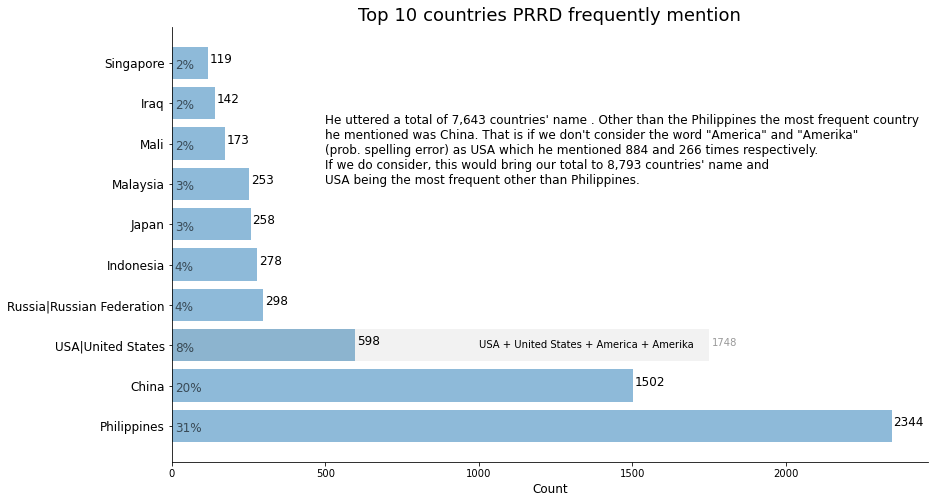

In [35]:
counts = df_countries.nlargest(n=10, columns='country_freq', keep='all')['country_freq'].values.tolist()
names = df_countries.nlargest(n=10, columns='country_freq', keep='all')['Name'].values.tolist()
names[2] = 'USA|' + names[2]
names[3] = names[3] + '|Russian Federation'

#Plot
plt.figure(figsize=(15,8))
plt.barh(range(len(counts)), counts, alpha=0.5)

#USA additional plot

#united statates america count
united_states_america_count = count_num_occur(df_all.concat_trans.values[0], ['united', 'states', 'america'])

#I have to deduct united_states_america_count since "united states america" had already beeen counted
#from counting "united states"
america_count = count_num_occur(df_all.concat_trans.values[0], 'america') - united_states_america_count
#amerika count
amerika_count = count_num_occur(df_all.concat_trans.values[0], 'amerika')

#usa + america + amerika count
plt.yticks(range(len(counts)), names, size=12)
usa_count = america_count + amerika_count + counts[2]
plt.barh(2, usa_count, color='grey', alpha=0.1)
plt.text(usa_count+10,1.98, s=usa_count, color='grey', alpha=0.8)

#Show count
show_number(counts, orientation='hotizontal',x_offset=5,fontdict={'fontsize':12})

#Show percentage
sm = df_countries.country_freq.sum()
percentage = [str(int(round(x / sm * 100, 0))) + '%' for x in counts]
show_number(np.full((len(percentage)), 10,), percentage, orientation='horizontal', 
           y_offset=-0.15, fontdict={'fontsize':12, 'alpha':0.6})
sm_america_amerika = sm + america_count + amerika_count
percent_usa_america_amerika = str(int(round(usa_count / sm_america_amerika * 100, 0) )) + '%'
# plt.text(x=1000, y=1.95, s=percent_usa_america_amerika)

#Text Title
plt.title('Top 10 countries PRRD frequently mention', size=18)


#Text Body
plt.text(x=500, y=6, s=f'He uttered a total of {sm:,} countries\' name . Other than the Philippines the most frequent country\n\
he mentioned was China. That is if we don\'t consider the word "America" and "Amerika" \n\
(prob. spelling error) as USA which he mentioned {america_count} and {amerika_count} times respectively.\n\
If we do consider, this would bring our total to {sm_america_amerika:,} countries\' name and \n\
USA being the most frequent other than Philippines.' , fontdict={'fontsize':12})
# plt.text(x=600, y =8, s=f'He also mentioned "America" {america_count} times but didn\'t include it here.',
#         fontdict={'fontsize':12, 'color':'blue'})
plt.text(x=1000, y=1.95, s='USA + United States + America + Amerika')

sns.despine()
plt.xlabel('Count', size=12)
plt.subplots_adjust(left=0.2)
# plt.savefig('pictures\\Top_Countries_Mentioned.png')
plt.show()

*** 

# 5. Nationality  Frequently Mentioned <div id='section5'> </div>

In [36]:
df_countries

,CCA2,Name,CCA3,Nationality,name_lower,country_freq
0,AD,Andorra,AND,Andorran,andorra,0
1,AE,United Arab Emirates,ARE,Emirati,united arab emirates,1
2,AF,Afghanistan,AFG,Afghan,afghanistan,10
3,AG,Antigua and Barbuda,ATG,"Antiguan, Barbudan",antigua and barbuda,0
4,AI,Anguilla,AIA,Anguillian,anguilla,0
...,...,...,...,...,...,...
256,YE,Yemen,YEM,Yemeni,yemen,3
257,YT,Mayotte,MYT,French,mayotte,0
258,ZA,South Africa,ZAF,South African,south africa,6
259,ZM,Zambia,ZMB,Zambian,zambia,1


>Let's lower the nationality

In [37]:
df_countries['nationality_lower'] = df_countries.Nationality.str.lower()
df_countries

,CCA2,Name,CCA3,Nationality,name_lower,country_freq,nationality_lower
0,AD,Andorra,AND,Andorran,andorra,0,andorran
1,AE,United Arab Emirates,ARE,Emirati,united arab emirates,1,emirati
2,AF,Afghanistan,AFG,Afghan,afghanistan,10,afghan
3,AG,Antigua and Barbuda,ATG,"Antiguan, Barbudan",antigua and barbuda,0,"antiguan, barbudan"
4,AI,Anguilla,AIA,Anguillian,anguilla,0,anguillian
...,...,...,...,...,...,...,...
256,YE,Yemen,YEM,Yemeni,yemen,3,yemeni
257,YT,Mayotte,MYT,French,mayotte,0,french
258,ZA,South Africa,ZAF,South African,south africa,6,south african
259,ZM,Zambia,ZMB,Zambian,zambia,1,zambian


In [38]:
df_countries[df_countries.nationality_lower == 'american']

,CCA2,Name,CCA3,Nationality,name_lower,country_freq,nationality_lower
154,MP,Northern Mariana Islands,MNP,American,northern mariana islands,0,american
241,UM,U.S. Minor Outlying Islands,UMI,American,u.s. minor outlying islands,0,american
242,US,United States,USA,American,united states | usa,598,american


In [39]:
df_countries[df_countries.nationality_lower == 'chinese']

,CCA2,Name,CCA3,Nationality,name_lower,country_freq,nationality_lower
48,CN,China,CHN,Chinese,china,1502,chinese
98,HK,Hong Kong SAR China,HKG,Chinese,hong kong sar china,0,chinese
153,MO,Macau SAR China,MAC,Chinese,macau sar china,0,chinese


In [40]:
df_countries[df_countries.nationality_lower == '?']

,CCA2,Name,CCA3,Nationality,name_lower,country_freq,nationality_lower
9,AQ,Antarctica,ATA,?,antarctica,0,?
34,BV,Bouvet Island,BVT,?,bouvet island,0,?
52,CT,Canton and Enderbury Islands,CTE,?,canton and enderbury islands,0,?
76,FQ,French Southern and Antarctic Territories,ATF,?,french southern and antarctic territories,0,?
78,FX,Metropolitan France,FXX,?,metropolitan france,0,?
83,GF,French Guiana,GUF,?,french guiana,0,?
118,JT,Johnston Island,JTN,?,johnston island,0,?
174,NQ,Dronning Maud Land,ATN,?,dronning maud land,0,?
176,NT,Neutral Zone,NTZ,?,neutral zone,0,?
181,PC,Pacific Islands Trust Territory,PCI,?,pacific islands trust territory,0,?


>So some has the same nationality but we're going to treat them as one. There are also who has a question mark (?)  nationality so we'll exlude those. PRRD also sometimes refer to American as Americano  and Filipino as Pinoy so we'll include that in the list. He also refer to Japanese as Hapon but he could also be referring to 'hapon' as in 'afternoon'. We'll include also korean since in the list they are refered to as either north korean and south korean. Lastly we'll consider the plural form of these nationality by adding s as the last character. 

In [41]:
grouped_count = df_countries.groupby('nationality_lower')
nationality_lt = list(grouped_count.groups.keys())[1:]
nationality_lt.remove('filipino')
nationality_lt.append('filipino | pinoy')
nationality_lt.remove('american')
nationality_lt.append('american | amerikano')
nationality_lt.remove('japanese')
nationality_lt.append('japanese | hapon')
nationality_lt.remove('chinese')
nationality_lt.append('chinese | intsik')
nationality_lt.remove('north korean')
nationality_lt.remove('south korean')
nationality_lt.append('korean')

print(nationality_lt)

['afghan', 'albanian', 'algerian', 'american samoan', 'andorran', 'angolan', 'anguillian', 'antiguan, barbudan', 'argentinean', 'armenian', 'aruban', 'australian', 'austrian', 'azerbaijani', 'bahamian', 'bahraini', 'bangladeshi', 'barbadian', 'belarusian', 'belgian', 'belizean', 'beninese', 'bermudian', 'bhutanese', 'bolivian', 'bosnian, herzegovinian', 'brazilian', 'british', 'bruneian', 'bulgarian', 'burkinabe', 'burundian', 'cambodian', 'cameroonian', 'canadian', 'cape verdian', 'caymanian', 'central african', 'chadian', 'channel islander', 'chilean', 'christmas island', 'cocos islander', 'colombian', 'comoran', 'congolese', 'cook islander', 'costa rican', 'croatian', 'cuban', 'cypriot', 'czech', 'danish', 'djibouti', 'dominican', 'dutch', 'east timorese', 'ecuadorean', 'egyptian', 'emirati', 'equatorial guinean', 'eritrean', 'estonian', 'ethiopian', 'falkland islander', 'faroese', 'fijian', 'finnish', 'french', 'french polynesian', 'gabonese', 'gambian', 'georgian', 'german', 'ghan

>Let's count the number of occurences of these words

In [42]:
freq_lt = []
for national in nationality_lt:
    count = count_num_occur_multi_keys(df_all.concat_trans.values[0], national)
    
    #plural
    if national.find('|') == -1:
        count += count_num_occur_multi_keys(df_all.concat_trans.values[0], national + 's') 
    else:
        national = national.split('|')
        national = ' | '.join([x.strip() + "s" for x in national])
        count += count_num_occur_multi_keys(df_all.concat_trans.values[0], national)
    freq_lt.append(count)
    
    
df_nationality = pd.DataFrame(index=nationality_lt, data={'nationality_freq':freq_lt})
df_nationality.reset_index(inplace=True)
df_nationality.rename(columns={'index':'name'}, inplace=True)
df_nationality

,name,nationality_freq
0,afghan,0
1,albanian,0
2,algerian,0
3,american samoan,0
4,andorran,0
...,...,...
219,filipino | pinoy,2075
220,american | amerikano,1021
221,japanese | hapon,195
222,chinese | intsik,695


>Let's see the top 10

In [43]:
df_nationality.nlargest(n=10, columns='nationality_freq', keep='all')

,name,nationality_freq
219,filipino | pinoy,2075
220,american | amerikano,1021
222,chinese | intsik,695
221,japanese | hapon,195
223,korean,65
92,indonesian,62
163,russian,62
187,spanish,54
91,indian,49
117,malaysian,44


>These are the top nationality he frequently mention. Let's plot them.

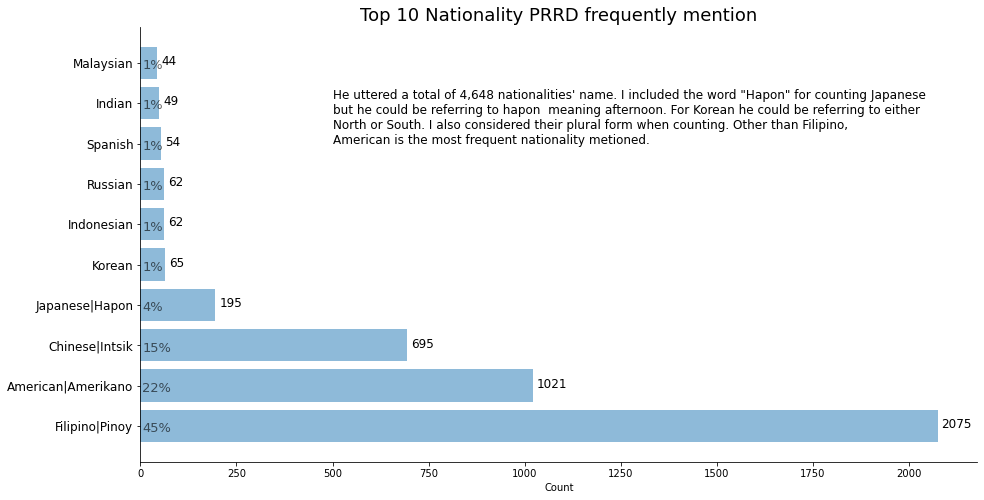

In [44]:
plt.figure(figsize=(15,8))
counts = df_nationality.nlargest(n=10, columns='nationality_freq', keep='all')['nationality_freq'].values.tolist()
#format properly
names = []
for name in df_nationality.nlargest(n=10, columns='nationality_freq', keep='all')['name']:
    if name.find('|') == -1:
        names.append(name.title())
    else:
        lt = [nm.title().strip() for nm in name.split('|')]
        names.append('|'.join(lt))

#Plotting
plt.barh(range(len(counts)), counts, alpha=0.5)
plt.yticks(range(len(counts)), names, size=12)

#Show Count
show_number(counts, orientation='hotizontal',x_offset=10,y_offset=-0.05, fontdict={'fontsize':12})

united_states_america_count = count_num_occur(df_all.concat_trans.values[0], ['united', 'states', 'america'])
#I have to deduct united_states_america_count since "united states of america" had already beeen counted
#from counting "united states"
america_count = count_num_occur(df_all.concat_trans.values[0], 'america') - united_states_america_count

#Show Percentage
sm = df_nationality.nationality_freq.sum()
percentage = [str(int(round(x / sm * 100, 0))) + '%' for x in counts]
show_number(np.full((len(percentage)), 5), percentage, orientation='horizontal', 
           y_offset=-0.15, fontdict={'fontsize':13, 'alpha':0.6})

#Text Title
plt.title('Top 10 Nationality PRRD frequently mention', size=18)
# plt.text(x=500, y=9.5,s='Top 10 countries PRRD frequently mention', fontdict={'fontsize':18})

amerika_count = count_num_occur(df_all.concat_trans.values[0], 'amerika')
amerikano_count = count_num_occur(df_all.concat_trans.values[0], 'amerikano')
plt.text(500, 7, f"He uttered a total of {sm:,} nationalities' name. I included the word \"Hapon\" for counting Japanese\n\
but he could be referring to hapon  meaning afternoon. For Korean he could be referring to either\n\
North or South. I also considered their plural form when counting. Other than Filipino,\n\
American is the most frequent nationality metioned." , size=12)
sns.despine()
plt.xlabel('Count')
# plt.savefig('pictures\\Top_Nationality_Mentioned.png')
plt.show()

***

# 6.  Frequently Mentioned Donors' last name <div section='section6'> </div>

In [45]:
words = ['floirendo', 'cayetano',  'te', 'uy', 'tan', 'alcantara', 'mendoza', 'regino']
for word in words:
    df_all[f'{word}_freq'] = count_num_occur(df_all.concat_trans.values[0], word)
df_all.T

,all
num_transcript,791
concat_trans,pati bong mayorship days moment bong right na...
num_words,1064390
health_freq,339
environment_freq,218
education_freq,234
economy_freq,251
security_freq,707
terrorism_freq,414
peace_freq,939


>Let's plot them

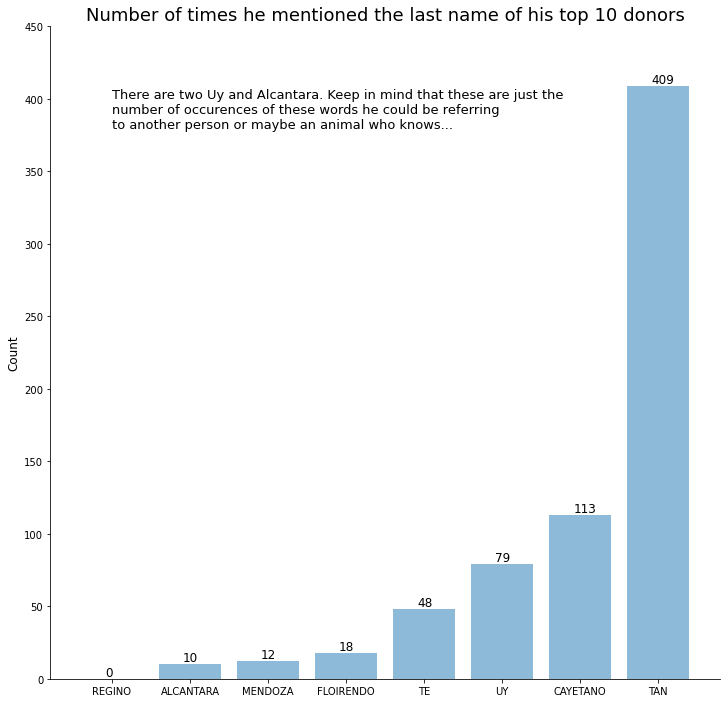

In [46]:
words = ['floirendo', 'cayetano',  'te', 'uy', 'tan', 'alcantara', 'mendoza', 'regino']
counts = [df_all[f'{x}_freq'].values[0] for x in words]
words = [words[i] for i in np.array(counts).argsort()]
counts = sorted(counts)

#Plot
plt.figure(figsize=(12,12))
plt.bar(range(len(words)), height=counts, alpha=0.5)
plt.xticks(range(len(words)), [x.upper() for x in words ])
plt.ylabel('Count', size=12)
show_number(counts=counts, y_offset=2, x_offset=-0.09, fontdict={'fontsize':12})

plt.title('Number of times he mentioned the last name of his top 10 donors', size=18)
sns.despine()
plt.ylim(0, 450)
plt.text(0, 380, 'There are two Uy and Alcantara. Keep in mind that these are just the\n\
number of occurences of these words he could be referring \n\
to another person or maybe an animal who knows...', size=13)
# plt.savefig('pictures\\Top_Donors.png')
plt.show()

***

# 7. Favorite swear words <div id='section7'> </div>
>This is a tricky one, I looked at the transcripts and most of the swear words are censored. The censored one starts with the first letter of the word then followed by asterisk '\*'. For example the word 'puta' is replaced by p***. I'm going to find words that starts with a letter followed by asterisk and have a counter for these words.

In [47]:
count = 0
swear_dct = {}
for txt in df_all.concat_trans.values[0].split(" "):
    if '*' in txt:
        isSwear = False
        for i in txt:
            if i != '*':
                isSwear = True
        if isSwear:
            if txt in swear_dct.keys():
                swear_dct[txt] += 1
            else:
                swear_dct[txt] = 1
df_swear = pd.DataFrame(data={'words': list(swear_dct.keys()), 'counts':list(swear_dct.values())})
display(df_swear)
print('\nTop 10')
display(df_swear.nlargest(10, 'counts'))

,words,counts
0,p*****,1951
1,i**,2447
2,i****,428
3,g*****,101
4,p***,404
...,...,...
297,ehp*****,1
298,s***sige,1
299,a**huwag,1
300,f***s,1



Top 10


,words,counts
1,i**,2447
0,p*****,1951
6,t***,539
5,g***,532
2,i****,428
10,y***,413
4,p***,404
8,p******,338
26,p****,299
18,l****,232


>The result shows a lot of  swear words a total of 302 but if we look at the few last swear words they are mostly those swear words at the top but written differently or concatenated to another word/character. Also the words "i***" or anything that start with i then followed by asterisk which I believe is "ina", 'inang' and so on is only a swear word if preceeded by "putang" or "tang". The whole swear word is "putang ina"  or "tang ina" and should be considered as one count. I have to remove any words in df_swear that starts with 'i'.

In [48]:
i_swear_words = df_swear[df_swear.words.apply(lambda x: x[0] == 'i')]
i_swear_words

,words,counts
1,i**,2447
2,i****,428
14,i*****,68
20,i***,88
80,i******,1
143,i**yang,1
147,i*,3
149,i**),1
164,i**mo,1
178,i**niya,1


>I have to remove all these words.

In [49]:
df_swear.drop(index=i_swear_words.index.values, inplace=True)
df_swear.reset_index(drop=True, inplace=True)
print('Top 10')
display(df_swear.nlargest(10, 'counts'))

Top 10


,words,counts
0,p*****,1951
4,t***,539
3,g***,532
8,y***,413
2,p***,404
6,p******,338
22,p****,299
15,l****,232
16,s***,228
11,f***,166


>There are a lot of swear words that start with p then followed by asterisk. I believe the first one is for "putang" second is "puta" base on the number of asterisk. The third one is a little bit tricky one, I looked at the transcrips and found out that most are followed by "i\*\*" which means it refers to "putang ina" it just that number of asterisk exceeded probably human error. Some occurence also is just the word 'p\*\*\*\*\*\*' and not being followed by "ina" or "i\*\*". This could refer to the word "punyeta" or just "putang". If you look at the phrases below which are some of the occurence of this word it actualy make sense for it to be "putang" than "punyeta". As for the last word that starts with 'p' I looked at also the transcripts and most are followed by "ina" or "i\*\*" so again it refers to "putang ina" just that the number of asterisk is probably lacking. As for its occurences that is not followed by the word "i\*\*" or "ina* it could be the word "piste". It could probably another "puta" or "putang" just that number of asterisk is exceeding or lacking.

>Anyways I already have a count for the number of times he said "putang ina" ([Section 3.1](#section31)). I'm just gonna use that count. As for the rest of pwords, I'm gonna use regulax expression the same thing I did in ([Section 3.1](#section31)) to find if followed by 'i\*\*\*' then deduct the count for these pwords since they are already included in my "putang ina" count. I'm gonna be removing also "p\*\*\*\*\*\*\*\*" and "p\*\*\*\*\*i\*\*" since they are also included in counting "putang ina".([Section 3.1](#section31)).

In [50]:
find_occur(df_all.concat_trans.values[0], 'p******', num=30, offset=10)

[' p****** i** wala kayong know youre b***s*** youre legal fronts',
 ' p****** i** huhubaran kita harap tao country comes mahal bayan',
 ' p****** i** pitsugin trial tingnan id happy place cross witness',
 ' p****** i**** pera term sign transaction papers reclamation railway belongs',
 ' p****** i**** human rights ganun drug lord f*** ta hihinto',
 ' p****** i** nagbabayad buwis hinihingian sampalin maski kayong t*** i**',
 ' p****** i** harap harapan magnakaw rob blind',
 ' p****** i** know begin read speech id like greet everybody',
 ' p****** i**** nakikinig buong bayan totoo talaga destroy country destroy',
 ' p****** i** makinig criminals kasalanan grieve blood tinitignan bumagsak tatay',
 ' p****** mundo papasok utak sira ulo crave fix pera magnakaw',
 ' p****** i** leni harap sampalin dalhin dare invite sinabi immigration',
 ' p****** i** talaga public p**** i** magnanakaw l*** ganon noticed',
 ' p****** i** celebrate y*** came country conquered subjugated filipinos slave',
 ' p

In [51]:
#I'm gona remove these in df_swear
key_word_putang_ina = ['p********', 'p*****i**']
lt_index = [df_swear[df_swear.words == wrd].index.values[0] for wrd in key_word_putang_ina]
df_swear.drop(index=lt_index, inplace=True)
df_swear.reset_index(inplace=True, drop=True)
df_swear

,words,counts
0,p*****,1951
1,g*****,101
2,p***,404
3,g***,532
4,t***,539
...,...,...
273,ehp*****,1
274,s***sige,1
275,a**huwag,1
276,f***s,1


>Now for p\*\*... words I'm gonna use regular expression to find if they are followed by i\*\*... and deduct count. again already counted in ([Section 3.1](#section31)).

In [52]:
df_p = df_swear[df_swear.words.apply(lambda x: bool(re.search('p\*+', x)))]
txt_lt = df_all.concat_trans.values[0].split(' ')
for i in df_p.index.values:
    count = 0
    wrd = df_swear.loc[i, 'words']
    for j in range(len(txt_lt)):
        #if they are equal
        if wrd == txt_lt[j]:
            #if next word has the pattern i**
            if re.search('i\*+', txt_lt[j + 1]):
                count += 1
    #subtract the count
    df_swear.loc[i, 'counts'] -= count
df_swear.nlargest(10, 'counts')

,words,counts
4,t***,539
3,g***,532
8,y***,413
2,p***,401
14,l****,232
15,s***,228
11,f***,166
40,u***,162
20,b****,153
0,p*****,122


>Now we'll include the "putang ina" count.

In [53]:
df_swear = \
df_swear.append(pd.Series({'words': 'putang ina', 'counts':df_all['putang_ina_freq'].values[0]}), ignore_index=True)

df_swear.nlargest(10, 'counts')

,words,counts
278,putang ina,2563
4,t***,539
3,g***,532
8,y***,413
2,p***,401
14,l****,232
15,s***,228
11,f***,166
40,u***,162
20,b****,153


>The top censored words corresponds to "tang", "gago", "yawa", "puta", "letse", "shit", "fuck", "ugok", "bitch". The word "tang" could iether be "tang ina" or just "tang". Let's find out which one corresponds to "tang ina" and then we're going to deduct its count to "t\*\*\*" and append another term for "tang ina".

In [54]:
txt_lt = df_all.concat_trans.values[0].split(' ')
count = 0
for i in range(len(txt_lt)):
    if txt_lt[i] == 't***':
        if bool(re.search('i\*+', txt_lt[i + 1])):
                count += 1
count
df_swear.loc[df_swear.words == 't***', 'counts'] -= count
df_swear = df_swear.append(pd.Series({'words':'tang ina', 'counts': count}), ignore_index=True)
df_swear.nlargest(10, 'counts')

,words,counts
278,putang ina,2563
3,g***,532
279,tang ina,482
8,y***,413
2,p***,401
14,l****,232
15,s***,228
11,f***,166
40,u***,162
20,b****,153


> As I mentioned before some of these swear words were written differently or not censored at all. That is why I'm gonna add a new feature that corresponds to possible way they are written atleast for for the top swear words.

In [55]:
# df_swear['alternate_key'] = np.nan
alternate = ['gago', 't***i** | t****** | tangina | tang ina', 'yawa', 'puta', 'letse | leche', 
             'shit', 'fuck', 'ugok | bugok', 'bitch']

for key, i in zip(alternate, df_swear.nlargest(10, 'counts').index.values[1:]):
    df_swear.loc[i, 'counts'] += count_num_occur_multi_keys(df_all.concat_trans.values[0], key)
    df_swear.loc[i, 'alternate_key'] = key

df_swear.nlargest(10, 'counts')

,words,counts,alternate_key
278,putang ina,2563,NaN
3,g***,597,gago
279,tang ina,555,t***i** | t****** | tangina | tang ina
8,y***,536,yawa
2,p***,423,puta
40,u***,306,ugok | bugok
14,l****,295,letse | leche
15,s***,256,shit
11,f***,175,fuck
20,b****,168,bitch


>I'm gonna remove "t\*\*\*i\*\*" and "t\*\*\*\*\*\*" in df_swear since they are only part of the count

In [59]:
index = df_swear[(df_swear.words == 't***i**') | (df_swear.words == 't******')].index.values
df_swear.drop(index=index, inplace=True)
df_swear.reset_index(inplace=True, drop=True)
df_swear.nlargest(10, 'counts')

,words,counts,alternate_key
256,putang ina,2563,NaN
3,g***,597,gago
257,tang ina,555,t***i** | t****** | tangina | tang ina
8,y***,536,yawa
2,p***,423,puta
38,u***,306,ugok | bugok
14,l****,295,letse | leche
15,s***,256,shit
11,f***,175,fuck
20,b****,168,bitch


>I'm gonna remove in df_swear whose count is 0

In [60]:
index = df_swear[df_swear.counts == 0].index.values.tolist()
df_swear.drop(index=index, inplace=True)
df_swear.reset_index(drop=True, inplace=True)
df_swear

,words,counts,alternate_key
0,p*****,122,NaN
1,g*****,101,NaN
2,p***,423,puta
3,g***,597,gago
4,t***,57,NaN
...,...,...,...
253,a**huwag,1,NaN
254,f***s,1,NaN
255,taran****,1,NaN
256,putang ina,2563,NaN


>Finally let's plot it

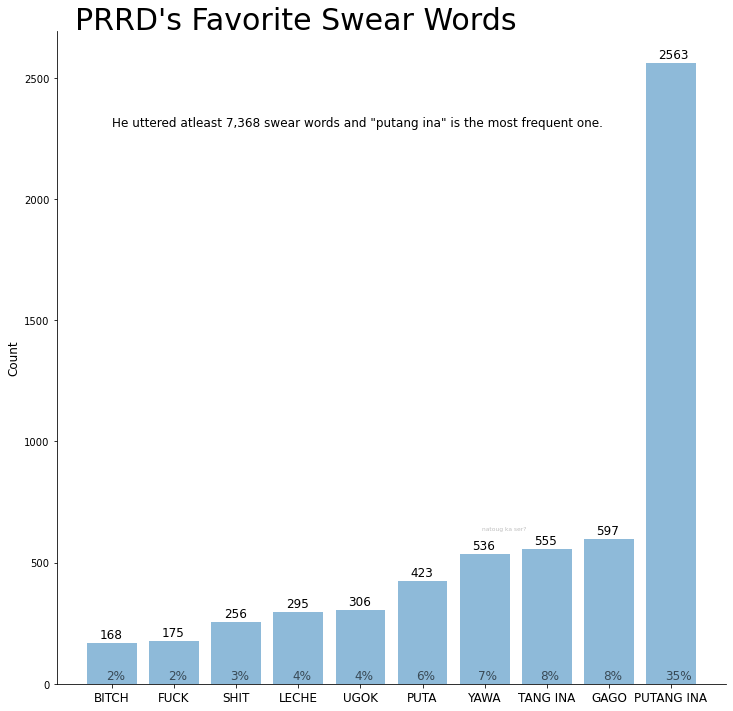

In [61]:
words = ['putang ina','gago', 'tang ina', 'yawa', 'puta', 'ugok', 'leche', 'shit', 'fuck',  'bitch'][::-1]
counts = df_swear.nlargest(10, 'counts')['counts'].values.tolist()[::-1]

#Plot
plt.figure(figsize=(12,12))
plt.bar(range(len(words)), counts, alpha=0.5)
plt.xticks(range(len(words)), [x.upper() for x in words ], size=12)
plt.ylabel('Count', size=12)
#Show number
show_number(counts=counts, y_offset=20, x_offset=-0.2, fontdict={'fontsize':12})
#Show percentage
sm = df_swear.counts.sum()
percentage = [ str(int(round(count /sm * 100, 0))) + '%' for count in counts]
show_number(np.full((len(percentage)), 100), words=percentage, x_offset=-0.1, 
            y_offset=-80, fontdict={'fontsize':12, 'alpha':0.6})
#Text Title
plt.text(-0.6, 2700, 'PRRD\'s Favorite Swear Words', size=30)
#Text Body
plt.text(0, 2300, f'He uttered atleast {sm:,} swear words and "putang ina" is the most frequent one.', size=12)

sns.despine()
plt.text(6-0.05, counts[6] + 100, 'natoug ka ser?', color='grey', alpha=0.5, size=6)
# plt.savefig('pictures\\Favorite_swear_words.png')
plt.show()

# 8. Number of times the word 'Bong' is mentioned <div id='section8'></div> 


## 8.1 Mentioned Bong Yearly basis <div id='section81'> </div>

In [62]:
years = [2016, 2017, 2018, 2019, 2020]
freq_lt = []
for year in years:
    freq_lt.append(count_num_occur(df_years.loc[year, 'concat_trans'], 'bong'))
df_years['bong_freq'] = freq_lt
display(df_years)

,concat_trans,num_trans,num_months,bong_freq
2016,president fidel ramos sir salamat tulong maki...,180,7,67
2017,kindly sit salamat secretary delfin lorenzana...,234,11,77
2018,salamat kindly sit agrarian reform secretary ...,195,12,199
2019,kindly sit sorry looking social welfare devel...,131,12,355
2020,pati bong mayorship days moment bong right na...,51,6,66


>So these are the number of occurence of the word "bong" starting from 2016 to 2020. We'll plot them

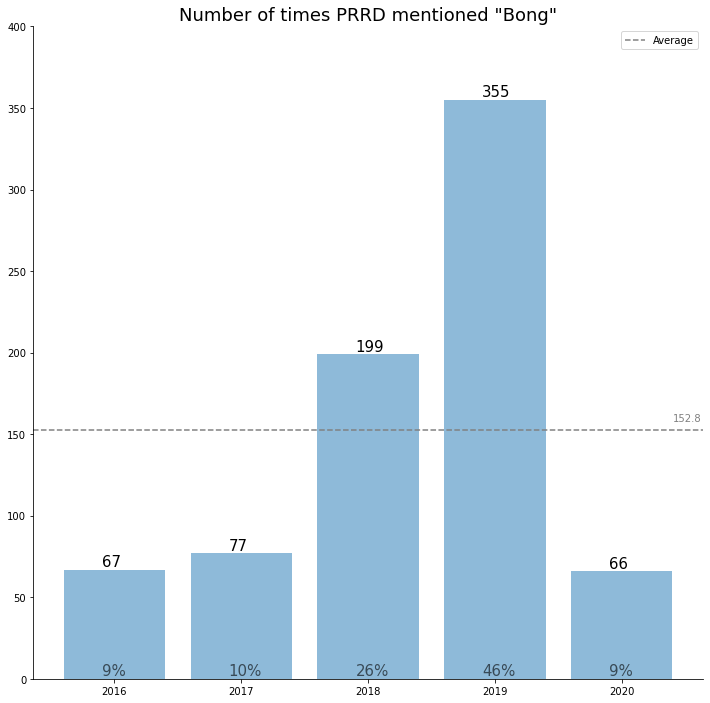

In [63]:
counts = df_years.bong_freq.values.tolist()
years = [2016, 2017, 2018, 2019, 2020]
#PLOTTING - we'll do a bar graph

plt.figure(figsize=(12, 12))
plt.bar(range(len(years)), counts, alpha=0.5)
plt.xticks(range(len(years)), years)
plt.ylim(0, 400)

#Show Number
show_number(counts=df_years.bong_freq, y_offset=2, x_offset=-0.1, fontdict={'fontsize':15},round_off=True)

#Show Percentage
sm = df_years.bong_freq.sum()
percentage = [ str(int(round(count /sm * 100, 0))) + '%' for count in counts]
show_number(np.full((len(percentage)), 1), words=percentage, x_offset=-0.1, 
            y_offset=1, fontdict={'fontsize':15, 'alpha':0.6})
# plt.

#Average
ave = df_years.bong_freq.mean()
plt.axhline(ave, label='Average', linestyle='--', color='grey')
plt.text(4.4,  int(round(ave+5)), ave, color='grey')

plt.legend()
plt.title('Number of times PRRD mentioned "Bong"', size=18)

sns.despine()
# plt.savefig('pictures\\Num_Bong_Years.png')
plt.show()

## 8.2 Mentioned Bong Monthly basis <div id='secion82'> </div>

In [64]:
freq_bong_month_lt = []
for trans in df_months.concat_trans.values:
    freq_bong_month_lt.append(count_num_occur(trans, 'bong'))
    

df_months['bong_freq'] = freq_bong_month_lt
display(df_months)

date_str                                       concat_trans  \
2016 6   2016, Jun.   president fidel ramos sir salamat tulong maki...   
     7   2016, Jul.   let begin addressing officer brigadier genera...   
     8   2016, Aug.   really intend interrupt ganito discourteous w...   
     9   2016, Sep.   maayong hapon let begin work id like remind y...   
     10  2016, Oct.   salamat kindly sit secretary judy taguiwalo; ...   
     11  2016, Nov.   alam really wanted structures government dest...   
     12  2016, Dec.   busy day midsayap pumutok simbahan day magbiy...   
2017 1   2017, Jan.   kindly sit salamat secretary delfin lorenzana...   
     2   2017, Feb.   dureza naka raise konting pera akala ma relea...   
     3   2017, Mar.   salamat sit excellencies diplomatic corps par...   
     4   2017, Apr.   excellency president joko widodo madame irian...   
     5    2017, May   kindly sit thank secretary delfin lorenzana; ...   
     6   2017, Jun.   im glad tonight enemy contend resistance figh...   
     7   2017, Jul.   kindly sit thank courtesy read prepared speec...   
     8   2017, Aug.   pages need longer time start rattling cabinet...   
     9   2017, Sep.   kindly sit thank courtesy know came hundreds ...   
     10  2017, Oct.   prime minister abe committed flesh japans spe...   
     11  2017, Nov.   nandoon medyo matagalan amoy bagoong boodle s...   
2018 1   2018, Jan.   kindly sit assalamualaikum maraming salamat p...   
     2   2018, Feb.   time maybe alongside mass surrenders ferocity...   
     3   2018, Mar.   thank courtesy kindly sit prepared speech pag...   
     4   2018, Apr.   clear relations larger community nations asea...   
     5    2018, May   salamat kindly sit pages mul billion investme...   
     6   2018, Jun.   maraming salamat kindly standing sit sitting ...   
     7   2018, Jul.   salamat courtesy kindly sit good written spee...   
     8   2018, Aug.   daghang salamat kindly sit thank courtesy pre...   
     9   2018, Sep.   commander tikas pahinga order requested thank...   
     10  2018, Oct.   kindly sit salamat kortesiya naa koy pages sp...   
     11  2018, Nov.   kauban gobyerno bobby; asawa; opisyales diri ...   
     12  2018, Dec.   salamat kindly sit agrarian reform secretary ...   
2019 1   2019, Jan.   magandang hapon sinadya talaga pupunta maynil...   
     2   2019, Feb.   salamat kindly sit thank id like talk penchan...   
     3   2019, Mar.   kindly sit thank excellencies diplomatic corp...   
     4   2019, Apr.   nandito sigurado education secretary leonor b...   
     5    2019, May   nikkei president naotoshi okada excellencies ...   
     6   2019, Jun.   salamat kindly seats page prepared speech bab...   
     7   2019, Jul.   kindly sit magandang hapon magandang gabi pal...   
     8   2019, Aug.   ndyour excellency pleased undertake visit cor...   
     9   2019, Sep.   xiè xie kindly sit trade industry secretary r...   
     10  2019, Oct.   start question yes taking bangkok tomorrow ni...   
     11  2019, Nov.   salamat magsiupo sit think time grace occasio...   
     12  2019, Dec.   kindly sit sorry looking social welfare devel...   
2020 1   2020, Jan.   sit salamat house speaker alan peter cayetano...   
     2   2020, Feb.   kindly sit salamat late pasig maka lantsa com...   
     3   2020, Mar.   ikatlong linggo pakigbisog formidable enemy s...   
     4   2020, Apr.   ahead yes berna good evening countrymen nagpa...   
     5    2020, May   pati bong mayorship days moment bong right na...   
     6   2020, Jun.   let start discussing issues affecting health ...   

         num_trans  bong_freq  
2016 6           1          0  
     7          21          3  
     8          29          2  
     9          35         19  
     10         30          8  
     11         22          4  
     12         42         31  
2017 1          19          7  
     2          21          0  
     3          32         21  
     4          32         11  


>So these are number of times DU30 mentioned the word 'bong'. As you can see there are missing months, as they are not available in the website. Let's graph this.

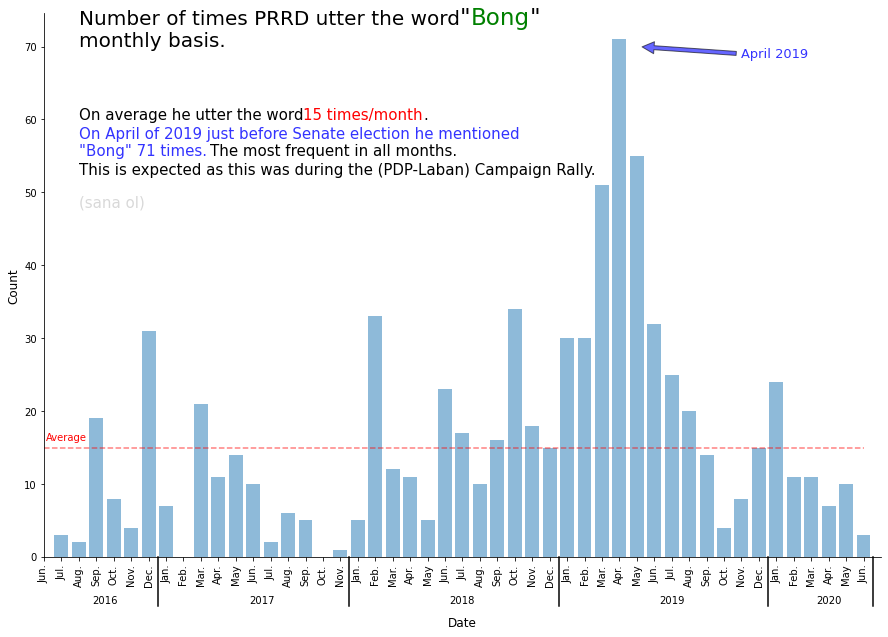

In [71]:
plt.figure(figsize=(15, 10))
plt.bar(range(df_months.shape[0]), df_months.bong_freq, alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':12})
plt.xlabel('Date', fontdict={'fontsize':12}, labelpad=30)
lbl = [x[6:].strip() for x in df_months.date_str.tolist()]

plt.xticks(range(df_months.shape[0]), lbl, rotation=90)

txt = ['Number of times PRRD utter the word', '"', 'Bong', '"']
colors = ['black', 'black2', 'green', 'black2']
sizes, colors = get_size_color(colors=colors, size_black=20, size_others=23)
rainbow_text(2 ,73, strings=txt, colors=colors, size=sizes)
plt.text(2, 70, 'monthly basis.',fontdict={'fontsize': 20})


freq_april_2019 = int(df_months.loc[(2019, 4), 'bong_freq'])
average = df_months.bong_freq.mean()

#text rendering
txt = ['On average he utter the word', f'{int(average)} times/month', '.']
colors = ['black', 'red', 'black']
sizes, colors = get_size_color(colors=colors, size_black = 15, size_others=15)
rainbow_text(2, 60, strings=txt, colors=colors,size=sizes)
plt.text(2, 55,f'On April of 2019 just before Senate election he mentioned \n"Bong" {freq_april_2019} times.', 
         fontdict={'fontsize':15, 'color':'blue', 'alpha':0.8})
plt.text(9.5, 55,'The most frequent in all months.', fontdict={'fontsize':15})
plt.text(2, 52.5, 'This is expected as this was during the (PDP-Laban) Campaign Rally.', fontdict={'fontsize':15})
plt.text(2, 48, '(sana ol)', fontdict={'fontsize':15, 'color':'grey', 'alpha':0.3})
total = 0
for i in df_years.index.values:
    val = df_years.loc[i, 'num_months']
    total += val
    offset = (total / df_months.shape[0]) - 0.01
    line = plt.Line2D([offset,offset], [-0.09, 0], transform=plt.gca().transAxes, color='black')
    line.set_clip_on(False)
    plt.gca().add_line(line)
    plt.text(total - (val * 0.5), -6, i,  horizontalalignment='center', verticalalignment='center',
                clip_on=False)
    
#average
plt.text(0.1, 16, 'Average', color='red')
plt.plot(range(df_months.shape[0]), np.full((df_months.shape[0]), 15), color='red', alpha=0.5, linestyle='--')
# plt.axhline(average, color='red', alpha=0.5)

#arrow
xy_largest = (df_months.index.tolist().index((2019, 4)) + 1, 70)
plt.annotate('', xy=xy_largest, xytext=(xy_largest[0]+6, 69),
            arrowprops=dict(facecolor='blue', shrink=0.05, alpha=0.6), )
plt.text(40, 68.5, 'April 2019', fontdict={'fontsize':13, 'color':'blue', 'alpha':0.8})
plt.xlim(0, df_months.shape[0])
sns.despine()
plt.savefig('pictures\\Bong_Monthly.png')
plt.show()

In [84]:
df.to_csv('csv\\df.csv', index=False)
df_all.T.to_csv('csv\\df_all.csv')
df_months.to_csv('csv\\df_months.csv')
df_years.to_csv('csv\\df_years.csv')
df_countries.to_csv('csv\\df_countries.csv')
df_nationality.to_csv('csv\\df_nationality.csv', index=False)
df_swear.to_csv('csv\\df_swear.csv', index=False)

# SAVE

In [72]:
with open('pickles\\df_all.pkl', 'wb') as fl:
    pkl.dump(df_all, fl)
    
with open('pickles\\df_months.pkl', 'wb') as fl:
    pkl.dump(df_months, fl)
        
with open('pickles\\df_years.pkl', 'wb') as fl:
    pkl.dump(df_years, fl)
    
with open('pickles\\df_countries.pkl', 'wb') as fl:
    pkl.dump(df_countries, fl)

with open('pickles\\df_nationality.pkl', 'wb') as fl:
    pkl.dump(df_nationality, fl)
    
with open('pickles\\df_swear.pkl', 'wb') as fl:
    pkl.dump(df_swear, fl)
    
with open('pickles\\df.pkl', 'wb') as fl:
    pkl.dump(df, fl)

# LOAD

In [3]:
with open('pickles\\df_all.pkl', 'rb') as fl:
    df_all = pkl.load(fl)
    
with open('pickles\\df_swear.pkl', 'rb') as fl:
    df_swear = pkl.load(fl)
    
with open('pickles\\df_months.pkl', 'rb') as fl:
    df_months = pkl.load(fl)
    
with open('pickles\\df_years.pkl', 'rb') as fl:
    df_years = pkl.load(fl)
    
with open('pickles\\df_countries.pkl', 'rb') as fl:
    df_countries = pkl.load(fl)
    
with open('pickles\\df_nationality.pkl', 'rb') as fl:
    df_nationality = pkl.load(fl)